In [ ]:
# Check if GPU is activated
import tensorflow as tf
tf.test.gpu_device_name() 

'/device:GPU:0'

####Mounting gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Reading the kaggle dataset

In [ ]:
import shutil
shutil.copy("/content/gdrive/MyDrive/project/state-farm-distracted-driver-detection.zip","/content/state-farm-distracted-driver-detection.zip")

'/content/state-farm-distracted-driver-detection.zip'

In [ ]:
! unzip state-farm-distracted-driver-detection.zip -d state-farm-distracted-driver-detection

##Image Preprocessing

In [ ]:
#@title
#@title
import os
from numpy import *
from numpy import expand_dims
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pandas as pd

!pip install pickle5
import pickle5 as pickle
set_printoptions(threshold=inf)

def preprocessing(image_path):
  global final_dataframe
  try:
    img = cv2.imread(image_path)
  except IOError:
    print("image could not be found")

  # height, width = img.shape

  height = 40
  width = 30
  img = cv2.resize(img, (height, width), interpolation=cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # img = cv2.imread(img)
  #img = color.rgb2gray(img)
  img = img.flatten()
  image_person, image_class = find_person(image_path)
  final_dataframe = final_dataframe.append({'Image_name': image_path.split("/")[-1], 
                                            "Person": image_person, 
                                            "Vector": img, 
                                            "Class": image_class}
                                            ,ignore_index=True)
   
def find_person(image_path):
  global driver_imgs_list
  image_name = image_path.split("/")[-1]
  if(image_name.count('_') > 1):
    temp = image_name.split('_')
    image_name = temp[0] + '_' + temp[1] + '.jpg'
  person_details = driver_imgs_list.loc[driver_imgs_list["img"] == image_name]
  image_person = person_details["subject"].values[0]
  image_class = person_details["classname"].values[0][1:]
  return (image_person, image_class)

def start_processing(c, directory_path):
  final_path = directory_path +"/" +c
  with os.scandir(final_path) as entries:
      for entry in entries:
          path = final_path + '/' + entry.name
          preprocessing(path)
         
  print(c + 'is done')

driver_imgs_list = pd.read_csv('/content/state-farm-distracted-driver-detection/driver_imgs_list.csv')
final_dataframe = pd.DataFrame(columns=['Image_name', 'Person', 'Vector', 'Class'])

directories =  '/content/state-farm-distracted-driver-detection/imgs/train'
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
(224,224,3)
for c in classes:
  start_processing(c,directories)

pickle_dataframe = final_dataframe
# suma = zeros(12288, dtype=float)
# for i in pickle_dataframe['Vector']:
#     suma += i
# mean = (suma/pickle_dataframe.shape[0])
# pickle_dataframe['Vector'] = pickle_dataframe['Vector'].apply(lambda x: x-mean)
pickle_dataframe.to_pickle("/content/gdrive/MyDrive/project/knn_val.pkl")

c0is done
c1is done
c2is done
c3is done
c4is done
c5is done
c6is done
c7is done
c8is done
c9is done


#Testing

In [ ]:
#@title Test Data
import os
from numpy import *
from numpy import expand_dims
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pandas as pd

set_printoptions(threshold=inf)

def preprocessing1(image_path):
    global test_dataframe
    try:
        img = cv2.imread(image_path)
    except IOError:
        print("image could not be found")

    height, width, columns = img.shape

    height = 40
    width = 30
    img = cv2.resize(img, (height, width), interpolation=cv2.INTER_LINEAR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img = img.flatten()
    name = image_path.split("/")[-1]
    test_dataframe = test_dataframe.append({'Image_name': name, 
                                            "Vector": img}
                                            ,ignore_index=True)
    print("done printing for ", name)


train_path = '/content/state-farm-distracted-driver-detection/imgs/test' 
test_dataframe = pd.DataFrame(columns=['Image_name', 'Vector'])

with os.scandir(train_path) as entries:
      for entry in entries:
          path = train_path + '/' + entry.name
          preprocessing1(path)

In [ ]:
!pip install pickle5
import pickle5 
test_dataframe.to_pickle("/content/gdrive/MyDrive/project/knn_test.pkl")

In [ ]:
import pandas as pd
test_data1 = pd.read_pickle('/content/gdrive/MyDrive/project/test_data.pkl')
test_data=test_data1.to_numpy()

In [ ]:
image_names=test_data[:,0]
vectors=test_data[:,1]
X_test=array([vectors[i].reshape(128,128,3) for i in range(len(vectors))])
X_test=X_test.transpose(3, 0, 1, 2)

(79726, 128, 128, 3)

In [ ]:
X_test.shape

(3, 79726, 128, 128)

In [ ]:
plt.imshow(X_test[10])
plt.axis('off')

##Data Visualization

In [ ]:
import os
from numpy import *
from numpy import expand_dims
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pandas as pd
data = pd.read_pickle('/content/gdrive/MyDrive/project/3_channel_128.pkl')
# data = pd.read_pickle('/content/gdrive/MyDrive/project/last_not_mean_centred.pkl')

# data = pd.read_pickle('/content/gdrive/MyDrive/project/final.pkl')

data1=data.to_numpy()
persons=data1[:,1]
values, counts = unique(persons, return_counts=True) # returns unique values in persons and their respective 
# frequency of occurence
for i in range(data1.shape[0]):
    data1[i][3]=int(data1[i][3]) 

In [ ]:
get_val_row_indices=where(persons=='p050')[0]
get_val_row_indices=append(get_val_row_indices,where(persons=='p015')[0])
get_val_row_indices=append(get_val_row_indices,where(persons=='p022')[0])
get_val_row_indices=append(get_val_row_indices,where(persons=='p056')[0])
val_data=array([data1[i] for i in get_val_row_indices]) # val_data is the v0.000001alidation data

# Ensuring that the validation data is randomly shuffed
random.shuffle(val_data)
# get_train_row_indices= where((persons!= 'p045') & (persons!='p072') & (persons!='p066') & (persons!='p035') & (persons!='p039') & (persons!='p041') )[0]
get_train_row_indices= where((persons!= 'p050') & (persons!='p015')  & (persons!='p022') & (persons!='p056') )[0]

print(len(get_train_row_indices),len(val_data))
train_data=array([data1[i] for i in get_train_row_indices]) # train_data is the training data
# Ensuring that the train data is randomly shuffed many times so as to make the training easier
random.shuffle(train_data)


18732 3692


In [ ]:
#@title
import seaborn as sns
dataset = pd.read_csv('/content/gdrive/MyDrive/project/driver_imgs_list.csv')
# npdataset = dataset.to_numpy()
# persons1=npdataset[:,1]
values1=array(['p050', 'p015', 'p022', 'p056'])
# Plot figure size
plt.figure(figsize = (5,5))
for i in range(len(values1)):
  df=dataset.loc[dataset['subject'] == values1[i] ]
  if i!=0:
    frames = [df1, df]
    df = pd.concat(frames)
  df1=df
# Count the number of images per category
sns.countplot(x = 'classname', data =df)
# Change the Axis names
plt.ylabel('Count')
plt.title('Categories Distribution of Validation data')
# Show plot
plt.show()
print(df)

values1=array(['p002','p012','p014', 'p016', 'p021', 'p024',
       'p026','p035','p039','p041', 'p042', 'p045', 'p047', 'p049','p051',
       'p052', 'p061', 'p066', 'p064','p072',
       'p075', 'p081'], dtype=object)
# Plot figure size
plt.figure(figsize = (5,5))
for i in range(len(values1)):
  df=dataset.loc[dataset['subject'] == values1[i] ]
  if i!=0:
    frames = [df1, df]
    df = pd.concat(frames)
  df1=df
# Count the number of images per category
sns.countplot(x = 'classname', data =df)
# Change the Axis names
plt.ylabel('Count')
plt.title('Categories Distribution of Train data')
# Show plot
plt.show()
print(df)

In [ ]:
size = 128
batch_size = 64
channels = 3

(-0.5, 127.5, 127.5, -0.5)

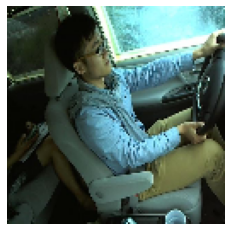

In [ ]:
#@title plotting image
data2=array([int(data1[0][2][i]) for i in range(size*size*channels)])
test_image=data2.reshape(size,size,channels)
test_image = test_image[...,::-1] # Added
plt.imshow(test_image)
plt.axis('off')
# data2=array([int(data1[0][2][i]*255) for i in range(size*size*channels)])
# plt.imshow(data2.reshape(size,size), cmap="gray")

In [ ]:
#@title
for i in range(len(counts)):
  print("{} {}".format(values[i],counts[i])) 

In [ ]:
#@title
import seaborn as sns
dataset = pd.read_csv('/content/gdrive/MyDrive/project/driver_imgs_list.csv')
npdataset = dataset.to_numpy()
# Plot figure size
plt.figure(figsize = (5,5))
for driver in values:
  new_data_set=dataset.loc[dataset['subject'] == driver]
  # Count the number of images per category
  sns.countplot(x = 'classname', data =new_data_set)
  # Change the Axis names
  plt.ylabel('Count')
  plt.title('Categories Distribution for {}'.format(driver))
  # Show plot
  plt.show()

In [ ]:
#@title
plt.figure(figsize = (5,5))
# Count the number of images per category
sns.countplot(x = 'classname', data =dataset)
# Change the Axis names
plt.ylabel('Count')

plt.title('Categories Distribution')
# Show plot
plt.show()


# Epoch 00011: val_loss improved from 1.16446 to 1.08469, saving model to model1.h5
# Epoch 12/25
# 569/569 [==============================] - 5s 9ms/step - loss: 0.0286 - accuracy: 0.9926 - val_loss: 1.1445 - val_accuracy: 0.7804

# Epoch 00012: val_loss did not improve from 1.08469
# Epoch 13/25
# 569/569 [==============================] - 5s 9ms/step - loss: 0.0138 - accuracy: 0.9959 - val_loss: 1.1746 - val_accuracy: 0.7811

# Epoch 00013: val_loss did not improve from 1.08469
# Epoch 14/25
# 569/569 [==============================] - 5s 9ms/step - loss: 0.0180 - accuracy: 0.9949 - val_loss: 1.1269 - val_accuracy: 0.8020
# 99 - accuracy: 0.9888 - val_loss: 1.0847 - val_accuracy: 0.7906



##Splitting data to train and test without Data leakage




In [ ]:
# pip install np-utils
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.utils import np_utils
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import h5py

In [ ]:
from keras.utils import np_utils
# !pip install pickle5
# import pickle5 as pickle
X_train=train_data[:,2]
X_train=array([X_train[i].reshape(size,size,channels)[...,::-1] for i in range(len(X_train))])
# X_train=array([X_train[i].reshape(size,size,channels) for i in range(len(X_train))])

y_train=train_data[:,3]  # The training class labels

X_val=val_data[:,2]
X_val=array([X_val[i].reshape(size,size,channels)[...,::-1] for i in range(len(X_val))])
# X_val=array([X_val[i].reshape(size,size,channels) for i in range(len(X_val))])

y_val=val_data[:,3]  # The validation class labels

y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)
# filename = "training.pkl"
# with open(filename, 'wb') as filehandler:
#     pickle.dump(X_train, filehandler)

In [ ]:
#@title
plt.imshow(X_train[108])
plt.show()
plt.imshow(X_val[108])
plt.show()
print(len(X_train),len(X_val))

In [ ]:
#@title
!pip3 install tensorflow-gpu

In [ ]:
#@title
!nvidia-smi

#### Plotting curves of VALIDATION and TRAIN accuracies and losses

In [ ]:
def plot_train_history(history):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.show()
# plot_train_history(history_v2)

## Implementing Pre-Trained Models

##VGG-16

In [ ]:
from keras.applications.vgg16 import preprocess_input
import pandas as pd                        
X_val1=preprocess_input(X_val)

In [ ]:
import shutil
shutil.copy("/content/knn_val.pkl","/content/gdrive/MyDrive/project/knn_val.pkl")

'/content/gdrive/MyDrive/project/knn_val.pkl'

In [ ]:
#@title 0.43 log loss

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

# re-size all the images to this
# add preprocessing layer to the front of VGG
vgg16_input = Input(shape = (size,size,channels))

vgg = VGG16(input_tensor=vgg16_input, weights='imagenet', include_top=False)

for layer in vgg.layers:
	layer.trainable = False

train_datagen=ImageDataGenerator(brightness_range=[0.7,1.3],shear_range=10,
                                    zoom_range=0.3, rotation_range=10, 
                                    width_shift_range=0.1,height_shift_range=0.1,
                                     preprocessing_function=preprocess_input,
                                )


train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=batch_size
)

x = vgg(vgg16_input)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.6)(x)
x = Dense(128, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)

# create a model object
model = Model(inputs = vgg16_input, outputs = prediction )

# our layers - you can add more if you want
# x = Flatten()(vgg.output)

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizers.SGD(learning_rate=1e-2, momentum=0.9),
  metrics=['accuracy']
)

model.summary()
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=9, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-9, verbose=1),
    ModelCheckpoint('vgg_finetune.h5', verbose=1, save_best_only=True, save_weights_only=True) ]

In [ ]:
model.load_weights('/content/gdrive/MyDrive/project/vgg_0.36__preproccessed_loss.h5')

In [ ]:
for layer in vgg.layers:
	layer.trainable = True
for layer in vgg.layers:
	print("{}: {}".format(layer, layer.trainable))

In [ ]:
train_datagen=ImageDataGenerator(brightness_range=[0.8,1.2],
                                    zoom_range=0.3, rotation_range=20, 
                                    width_shift_range=0.1,height_shift_range=0.1,
                                     preprocessing_function=preprocess_input,
                                )

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=batch_size)


model.summary()

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizers.Adagrad(learning_rate=2e-4,decay=1e-3/10),
  metrics=['accuracy']
)

a = model.fit(
  train_generator,
  steps_per_epoch=len(X_train) // batch_size, 
  validation_data=(X_val1,y_val),
  epochs=25,callbacks=callbacks )   

In [ ]:
model.load_weights('vgg3.h5')
from sklearn.metrics import log_loss
predictions_valid = model.predict(X_val1, batch_size=batch_size, verbose=1)
score = log_loss(y_val, predictions_valid)
print('Score log_loss: ', score)

58/58 [==============================] - 3s 38ms/step
Score log_loss:  0.43483777281079666


In [ ]:
plot_train_history(a)

# Resnet

In [ ]:
!pip install resnet

In [ ]:
!pip install Keras-Applications

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input


X_train1=preprocess_input(X_train)
X_val1=preprocess_input(X_val)

In [ ]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(128, 128, 3)))
baseModel.summary()
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)
# # place the head FC model on top of the base model (this will become
# # the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# # loop over all layers in the base model and freeze them so they will
# # *not* be updated during the training process

# for layer in baseModel.layers:
# 	layer.trainable = False
model.summary()

In [ ]:
batch_size=32
train_datagen=ImageDataGenerator(brightness_range=[0.4,1.6],shear_range=10,
                                    zoom_range=0.5, rotation_range=20, 
                                    width_shift_range=0.25,height_shift_range=0.25,
                                     preprocessing_function=preprocess_input,
                                )

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=batch_size
)

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.000001, verbose=1),
    ModelCheckpoint('resnet1.h5', verbose=1, save_best_only=True, save_weights_only=True) ]
for layer in baseModel.layers:
	layer.trainable = True



In [ ]:
for layer in baseModel.layers:
	layer.trainable = True
# for layer in baseModel.layers:
	# print("{}: {}".format(layer, layer.trainable))

model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizers.Adadelta(learning_rate=0.002) ,
  metrics=['accuracy']
)
model.summary()

In [ ]:
# train the model
H = model.fit(
	train_generator,
	steps_per_epoch=len(X_train1) // batch_size,
	validation_data=(X_val1,y_val),epochs=30, callbacks=callbacks)

# MobileNet

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import  preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

X_train1=preprocess_input(X_train)
X_val1=preprocess_input(X_val)

In [ ]:
baseModel = MobileNet(weights="imagenet", include_top=False, input_shape=(128, 128, 3) )
baseModel.summary()
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten()(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)
# # place the head FC model on top of the base model (this will become
# # the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# # loop over all layers in the base model and freeze them so they will
# # *not* be updated during the training process

for layer in baseModel.layers:
	layer.trainable = True

# for layer in baseModel.layers:
	# print("{}: {}".format(layer, layer.trainable))

model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizers.SGD(learning_rate=0.001) ,
  metrics=['accuracy']
)
model.summary()

In [ ]:
model.load_weights("/content/gdrive/MyDrive/project/mobilenet_0.398_loss_preprocessed.h5")

In [ ]:
for layer in baseModel.layers:
	layer.trainable = True
batch_size=64
train_datagen=ImageDataGenerator(brightness_range=[0.4,1.6],shear_range=10,
                                    zoom_range=0.5, rotation_range=20, 
                                    width_shift_range=0.25,height_shift_range=0.25,
                                     preprocessing_function=preprocess_input,
                                )

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=batch_size
)

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.000001, verbose=1),
    ModelCheckpoint('mobilenet2.h5', verbose=1, save_best_only=True, save_weights_only=True) ]


In [ ]:
import shutil
shutil.copy("/content/mobilenet2.h5","/content/gdrive/MyDrive/project/mobilenet_0.3407_loss_preprocessed.h5")

In [ ]:
model.load_weights("mobilenet2.h5")
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizers.Adagrad(learning_rate=0.0001) ,
  metrics=['accuracy']
)

In [ ]:
# train the model
H = model.fit(
	train_generator,
	steps_per_epoch=len(X_train1) // batch_size,
	validation_data=(X_val1,y_val),epochs=30, callbacks=callbacks)

Epoch 1/30
292/292 [==============================] - 93s 308ms/step - loss: 0.1492 - accuracy: 0.9545 - val_loss: 0.3418 - val_accuracy: 0.9049

Epoch 00001: val_loss did not improve from 0.34047
Epoch 2/30
292/292 [==============================] - 89s 305ms/step - loss: 0.1450 - accuracy: 0.9563 - val_loss: 0.3781 - val_accuracy: 0.8976

Epoch 00002: val_loss did not improve from 0.34047
Epoch 3/30
292/292 [==============================] - 89s 305ms/step - loss: 0.1425 - accuracy: 0.9580 - val_loss: 0.3576 - val_accuracy: 0.8984

Epoch 00003: val_loss did not improve from 0.34047
Epoch 4/30
 10/292 [>.............................] - ETA: 1:24 - loss: 0.1336 - accuracy: 0.9625

KeyboardInterrupt: ignored